## Bart Torvik Historical Data Preprocessing

#### Setup and Data Loading

In [164]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/barttorvik_historical.csv")

print(df.shape)
print(df.columns.tolist())
df.head()

(6324, 20)
['team', 'conf', 'barthag', 'barthag_rk', 'adj_o', 'adj_o_rk', 'adj_d', 'adj_d_rk', 'adj_t', 'adj_t_rk', 'wab', 'nc_elite_sos', 'nc_fut_sos', 'nc_cur_sos', 'ov_elite_sos', 'ov_fut_sos', 'ov_cur_sos', 'seed', 'year', 'season']


,team,conf,barthag,barthag_rk,adj_o,adj_o_rk,adj_d,adj_d_rk,adj_t,adj_t_rk,wab,nc_elite_sos,nc_fut_sos,nc_cur_sos,ov_elite_sos,ov_fut_sos,ov_cur_sos,seed,year,season
0,Kansas,B12,0.982498,1,121.369,2,85.5065,2,68.6453,117,9.927648,16,0.4877,0.4877,33,0.7008,0.7008,1.0,2008,2008
1,Memphis,CUSA,0.971452,2,116.963,6,86.0686,3,70.1847,72,8.925489,25,0.6424,0.6424,26,0.6499,0.6499,1.0,2008,2008
2,UCLA,P10,0.966392,3,116.196,8,86.7657,5,66.0740,215,10.766959,18,0.4743,0.4743,33,0.6896,0.6896,1.0,2008,2008
3,North Carolina,ACC,0.965916,4,122.927,1,91.9077,26,74.6909,8,11.896897,21,0.5551,0.5551,34,0.7231,0.7231,1.0,2008,2008
4,Wisconsin,B10,0.959993,5,112.570,36,85.3906,1,63.1199,306,8.268906,22,0.5430,0.5430,30,0.6862,0.6862,3.0,2008,2008


In [165]:
# Remove 2025 season, which is incomplete
df = df[df['year'] != 2025]
print(df['year'].unique())

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024]


#### Explore Raw Data

In [166]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 5960 entries, 0 to 5959
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   team          5960 non-null   object 
 1   conf          5960 non-null   object 
 2   barthag       5960 non-null   float64
 3   barthag_rk    5960 non-null   int64  
 4   adj_o         5960 non-null   float64
 5   adj_o_rk      5960 non-null   int64  
 6   adj_d         5960 non-null   float64
 7   adj_d_rk      5960 non-null   int64  
 8   adj_t         5960 non-null   float64
 9   adj_t_rk      5960 non-null   int64  
 10  wab           5960 non-null   float64
 11  nc_elite_sos  5960 non-null   int64  
 12  nc_fut_sos    5960 non-null   float64
 13  nc_cur_sos    5960 non-null   float64
 14  ov_elite_sos  5960 non-null   int64  
 15  ov_fut_sos    5960 non-null   float64
 16  ov_cur_sos    5960 non-null   float64
 17  seed          1078 non-null   float64
 18  year          5960 non-null   int

,barthag,barthag_rk,adj_o,adj_o_rk,adj_d,adj_d_rk,adj_t,adj_t_rk,wab,nc_elite_sos,nc_fut_sos,nc_cur_sos,ov_elite_sos,ov_fut_sos,ov_cur_sos,seed,year,season
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,1078.000000,5960.000000,5960.000000
mean,0.494462,175.843456,102.823671,175.843456,102.824390,175.843456,67.391343,175.843456,-7.678331,17.636577,1.497247,0.475129,17.488591,0.494419,0.494499,8.768089,2016.071644,2016.071644
std,0.257429,101.300204,7.464320,101.300204,6.476725,101.300204,3.050528,101.300204,6.853231,6.411398,18.552272,0.100801,8.073367,0.131427,0.131395,4.674952,4.903198,4.903198
min,0.005001,1.000000,72.222100,1.000000,83.118700,1.000000,56.739000,1.000000,-26.615476,0.000000,0.045500,0.000000,3.000000,0.176900,0.176900,1.000000,2008.000000,2008.000000
25%,0.279299,88.000000,97.782500,88.000000,98.255200,88.000000,65.426625,88.000000,-12.681616,13.000000,0.409875,0.408800,11.000000,0.390400,0.390500,5.000000,2012.000000,2012.000000
50%,0.475560,176.000000,102.502500,176.000000,102.824500,176.000000,67.321600,176.000000,-8.056805,17.000000,0.475250,0.474700,15.000000,0.466500,0.466550,9.000000,2016.000000,2016.000000
75%,0.719141,263.000000,107.771250,263.000000,107.442000,263.000000,69.313800,263.000000,-2.947026,21.000000,0.542200,0.541700,23.000000,0.605350,0.605350,13.000000,2020.000000,2020.000000
max,0.984165,363.000000,129.065000,363.000000,123.981000,363.000000,84.457500,363.000000,13.089013,55.000000,347.000000,0.874800,42.000000,0.835900,0.835900,16.000000,2024.000000,2024.000000


In [167]:
df.isnull().sum()

team               0
conf               0
barthag            0
barthag_rk         0
adj_o              0
adj_o_rk           0
adj_d              0
adj_d_rk           0
adj_t              0
adj_t_rk           0
wab                0
nc_elite_sos       0
nc_fut_sos         0
nc_cur_sos         0
ov_elite_sos       0
ov_fut_sos         0
ov_cur_sos         0
seed            4882
year               0
season             0
dtype: int64

In [168]:
print(df['seed'].unique())

[ 1.  3.  2.  4.  6.  5. 10.  9.  7. 11.  8. nan 12. 13. 14. 16. 15.]


#### Create Target Varaibles

In [169]:
# Define Final Four teams (manual list)
final_four_teams = [
    # 2024
    (2024, "Connecticut"), (2024, "Purdue"), (2024, "Alabama"), (2024, "NC State"),
    
    # 2023
    (2023, "Connecticut"), (2023, "San Diego St."), (2023, "Miami"), (2023, "Florida Atlantic"),
    
    # 2022
    (2022, "Kansas"), (2022, "North Carolina"), (2022, "Villanova"), (2022, "Duke"),
    
    # 2021
    (2021, "Baylor"), (2021, "Gonzaga"), (2021, "Houston"), (2021, "UCLA"),
    
    # 2020 - Tournament cancelled due to COVID-19
    
    # 2019
    (2019, "Virginia"), (2019, "Texas Tech"), (2019, "Michigan St."), (2019, "Auburn"),
    
    # 2018
    (2018, "Villanova"), (2018, "Michigan"), (2018, "Kansas"), (2018, "Loyola Chicago"),
    
    # 2017
    (2017, "North Carolina"), (2017, "Gonzaga"), (2017, "Oregon"), (2017, "South Carolina"),
    
    # 2016
    (2016, "Villanova"), (2016, "North Carolina"), (2016, "Syracuse"), (2016, "Oklahoma"),
    
    # 2015
    (2015, "Duke"), (2015, "Wisconsin"), (2015, "Kentucky"), (2015, "Michigan St."),
    
    # 2014
    (2014, "Connecticut"), (2014, "Kentucky"), (2014, "Florida"), (2014, "Wisconsin"),
    
    # 2013
    (2013, "Louisville"), (2013, "Michigan"), (2013, "Syracuse"), (2013, "Wichita St."),
    
    # 2012
    (2012, "Kentucky"), (2012, "Kansas"), (2012, "Louisville"), (2012, "Ohio St."),
    
    # 2011
    (2011, "Connecticut"), (2011, "Butler"), (2011, "Kentucky"), (2011, "VCU"),
    
    # 2010
    (2010, "Duke"), (2010, "Butler"), (2010, "Michigan St."), (2010, "West Virginia"),
    
    # 2009
    (2009, "North Carolina"), (2009, "Michigan St."), (2009, "Connecticut"), (2009, "Villanova"),
    
    # 2008
    (2008, "Kansas"), (2008, "Memphis"), (2008, "North Carolina"), (2008, "UCLA"),
]

final_four_df = pd.DataFrame(final_four_teams, columns=['year', 'team_final_four'])
final_four_df.head()


,year,team_final_four
0,2024,Connecticut
1,2024,Purdue
2,2024,Alabama
3,2024,NC State
4,2023,Connecticut


#### Final Four Team Name Standardization

In [170]:
# Cell 2: Standardize team names function
def standardize_team_name(name):
    """
    Standardize team names to ensure consistent matching between 
    Barttorvik data and Final Four results.
    
    Handles common variations and abbreviations.
    """
    if pd.isna(name):
        return name
    
    # Convert to string and strip whitespace
    name = str(name).strip()
    
    # Dictionary of known variations
    replacements = {
        # UConn variations
        'UConn': 'Connecticut',
        
        # North Carolina variations
        'UNC': 'North Carolina',
        'N. Carolina': 'North Carolina',
        
        # Miami variations
        'Miami FL': 'Miami',
        'Miami (FL)': 'Miami',
        
        # Michigan State variations
        'Michigan State': 'Michigan St.',
        'Mich. St.': 'Michigan St.',
        'MSU': 'Michigan St.',
        
        # San Diego State variations
        'SDSU': 'San Diego St.',
        'San Diego State': 'San Diego St.',
        
        # NC State variations
        'N.C. State': 'NC State',
        'North Carolina St.': 'NC State',
        
        # Wichita State variations
        'Wichita State': 'Wichita St.',
        
        # Loyola Chicago variations
        'Loyola-Chicago': 'Loyola Chicago',
        'Loyola IL': 'Loyola Chicago',
        'Loyola (IL)': 'Loyola Chicago',
        
        # Florida Atlantic variations
        'Fla. Atlantic': 'Florida Atlantic',
        'FAU': 'Florida Atlantic',
        
        # VCU (no variations, just ensure consistency)
        'Virginia Commonwealth': 'VCU',
        
        # West Virginia variations
        'W. Virginia': 'West Virginia',
        'WVU': 'West Virginia',
        
        # Texas Tech variations
        'Texas Tech': 'Texas Tech',
        'TTU': 'Texas Tech',
        
        # Ohio State variations
        'Ohio State': 'Ohio St.',
        'Ohio St': 'Ohio St.',
        'OSU': 'Ohio St.',
        
        # South Carolina variations
        'S. Carolina': 'South Carolina',
        'South Carolina': 'South Carolina',
    }
    
    # Return standardized name if found, otherwise return original
    return replacements.get(name, name)

# Test the function on a few examples
test_names = ['UConn', 'Michigan State', 'San Diego St.', 'Loyola Chicago']
print("Testing standardization:")
for test in test_names:
    print(f"  {test} → {standardize_team_name(test)}")

Testing standardization:
  UConn → Connecticut
  Michigan State → Michigan St.
  San Diego St. → San Diego St.
  Loyola Chicago → Loyola Chicago


In [171]:
# Apply standardization to both datasets
df['team_clean'] = df['team'].apply(standardize_team_name)
final_four_df['team_clean'] = final_four_df['team_final_four'].apply(standardize_team_name)

# Get list of Final Four teams from our manual list
ff_teams_list = set(final_four_df['team_clean'].unique())

# Get list of teams actually in the Barttorvik data
barttorvik_teams = set(df['team_clean'].unique())

# Find Final Four teams that DON'T appear in Barttorvik data
missing_in_barttorvik = ff_teams_list - barttorvik_teams

print("="*80)
print("MISMATCH CHECK")
print("="*80)

if len(missing_in_barttorvik) > 0:
    print(f"\n⚠️  WARNING: {len(missing_in_barttorvik)} Final Four teams not found in Barttorvik data:")
    for team in sorted(missing_in_barttorvik):
        print(f"  - {team}")
    
    print("\n🔍 Looking for similar names in Barttorvik data:")
    for missing_team in sorted(missing_in_barttorvik):
        # Find teams with similar names
        similar = [t for t in barttorvik_teams if missing_team[:5].lower() in t.lower() or t[:5].lower() in missing_team.lower()]
        if similar:
            print(f"\n  '{missing_team}' might match:")
            for s in similar:
                print(f"    → {s}")
else:
    print("All Final Four teams found in Barttorvik data")

# Also check year-by-year to catch mismatches
print("\n" + "="*80)
print("YEAR-BY-YEAR MATCH CHECK")
print("="*80)

for year in sorted(final_four_df['year'].unique()):
    ff_teams_year = set(final_four_df[final_four_df['year'] == year]['team_clean'])
    barttorvik_teams_year = set(df[df['year'] == year]['team_clean'])
    
    missing_year = ff_teams_year - barttorvik_teams_year
    
    if len(missing_year) > 0:
        print(f"{year}: Missing {len(missing_year)} teams:")
        for team in missing_year:
            print(f"    - {team}")
            # Show what teams ARE available for that year that might be close
            year_teams = df[df['year'] == year]['team_clean'].unique()
            similar = [t for t in year_teams if team[:4].lower() in t.lower() or t[:4].lower() in team.lower()]
            if similar:
                print(f"      Possible matches: {similar}")
    else:
        print(f"{year}: All 4 teams matched")

print("\n" + "="*80)

MISMATCH CHECK
All Final Four teams found in Barttorvik data

YEAR-BY-YEAR MATCH CHECK
2008: All 4 teams matched
2009: All 4 teams matched
2010: All 4 teams matched
2011: All 4 teams matched
2012: All 4 teams matched
2013: All 4 teams matched
2014: All 4 teams matched
2015: All 4 teams matched
2016: All 4 teams matched
2017: All 4 teams matched
2018: All 4 teams matched
2019: All 4 teams matched
2021: All 4 teams matched
2022: All 4 teams matched
2023: All 4 teams matched
2024: All 4 teams matched



In [172]:
# Merge and create target
df = df.merge(
    final_four_df[['year', 'team_clean']].assign(final_four=1),
    on=['year', 'team_clean'],
    how='left'
)
df['final_four'] = df['final_four'].fillna(0).astype(int)

In [173]:
# Check target variable
df[df['final_four'] == 1][['team_clean', 'year', 'seed', 'barthag']].sort_values('year')

,team_clean,year,seed,barthag
0,Kansas,2008,1.0,0.982498
1,Memphis,2008,1.0,0.971452
2,UCLA,2008,1.0,0.966392
3,North Carolina,2008,1.0,0.965916
342,Connecticut,2009,1.0,0.967550
...,...,...,...,...
5261,Miami,2023,5.0,0.871486
5611,Alabama,2024,4.0,0.915401
5598,Connecticut,2024,1.0,0.979889
5600,Purdue,2024,1.0,0.964935


#### Exploratory Data Analysis


In [174]:
# Average metrics for Final Four vs non-Final Four teams
df.groupby('final_four')[['barthag', 'adj_o', 'adj_d', 'seed', 'wab']].mean()

,barthag,adj_o,adj_d,seed,wab
final_four,,,,,
0,0.489637,102.658766,102.945712,9.097633,-7.835263
1,0.938981,118.015516,91.647566,3.546875,6.779043


<Axes: >

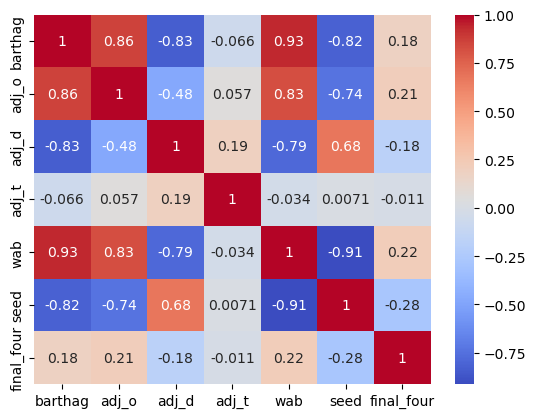

In [175]:
corr = df[['barthag', 'adj_o', 'adj_d', 'adj_t', 'wab', 'seed', 'final_four']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Final Four Teams by Seed (2008-2024)')

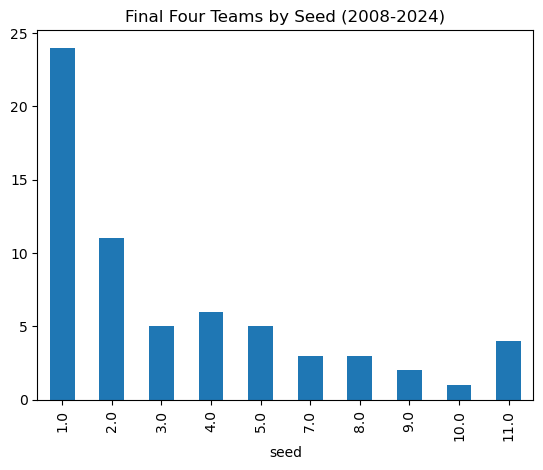

In [176]:
# Seed distribution for Final Four teams
df[df['final_four'] == 1]['seed'].value_counts().sort_index().plot(kind='bar')
plt.title('Final Four Teams by Seed (2008-2024)')

<Axes: ylabel='conf'>

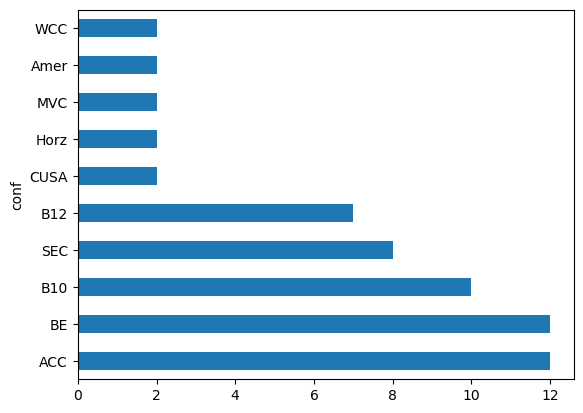

In [177]:
# Top conferences for Final Four teams
df[df['final_four'] == 1]['conf'].value_counts().head(10).plot(kind='barh')

#### Feature Engineering

In [178]:
# Create new features
df['adj_net_efficiency'] = df['adj_o'] - df['adj_d']
df['elite_seed'] = (df['seed'] <= 4).astype(int)
df['made_tournament'] = df['seed'].notna().astype(int)
df['seed_filled'] = df['seed'].fillna(17)
df['barthag_squared'] = df['barthag'] ** 2
df['fast_tempo'] = (df['adj_t'] > df['adj_t'].median()).astype(int)

In [179]:
# Visualize new features
df.groupby('final_four')['adj_net_efficiency'].mean()

final_four
0    -0.286947
1    26.367950
Name: adj_net_efficiency, dtype: float64

In [180]:
# Check correlations with target
feature_corrs = df[['adj_net_efficiency', 'elite_seed', 'barthag_squared', 'final_four']].corr()['final_four'].sort_values(ascending=False)
print(feature_corrs)

final_four            1.000000
elite_seed            0.347267
adj_net_efficiency    0.229001
barthag_squared       0.221261
Name: final_four, dtype: float64


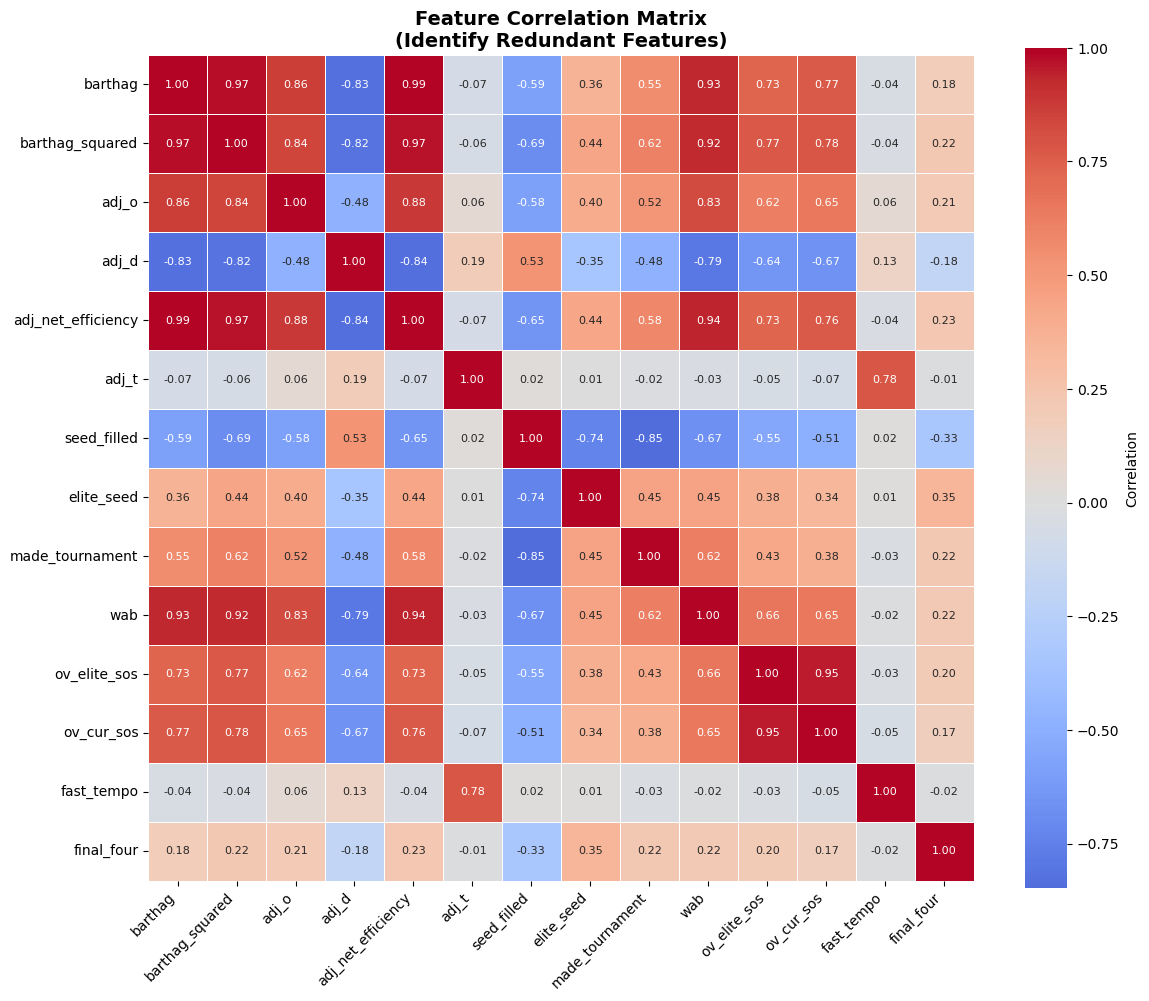

In [181]:
# Full correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={'label': 'Correlation'},
            annot_kws={'size': 8})
plt.title('Feature Correlation Matrix\n(Identify Redundant Features)', 
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [182]:
print(f"Starting shape: {df.shape}")

Starting shape: (5960, 28)


In [183]:
# Drop redundant rank columns
rank_cols = [col for col in df.columns if '_rk' in col]
print(f"\nDropping {len(rank_cols)} rank columns: {rank_cols}")


Dropping 4 rank columns: ['barthag_rk', 'adj_o_rk', 'adj_d_rk', 'adj_t_rk']


In [184]:
# Drop redundant SOS metrics
sos_to_drop = ['nc_elite_sos', 'nc_fut_sos', 'nc_cur_sos', 'ov_fut_sos', 'ov_elite_sos']

In [185]:
# Drop features with low/redundant correlation
redundant_features = [
    'adj_net_efficiency',  # Redundant with barthag (0.99 correlation)
    'barthag_squared',      # Redundant with barthag (0.97 correlation)
    'adj_t',               # No predictive power (-0.01 correlation)
    'fast_tempo',          # No predictive power (-0.02 correlation)
]

In [186]:
other_drops = ['team_final_four', 'seed']  # Now have team_clean and seed_filled

In [187]:
all_drops = rank_cols + sos_to_drop + redundant_features + other_drops

In [188]:
# Only drop columns that actually exist
cols_to_drop = [col for col in all_drops if col in df.columns]
print(f"\nTotal columns to drop: {len(cols_to_drop)}")


Total columns to drop: 14


In [189]:
df_clean = df.drop(columns=cols_to_drop)

print(df_clean.shape)

(5960, 14)


In [190]:
# Step 5: Remove 2020 (COVID - no tournament)
print(f"\nBefore removing 2020: {df_clean.shape[0]} rows")
df_clean = df_clean[df_clean['year'] != 2020]
print(f"After removing 2020: {df_clean.shape[0]} rows")


Before removing 2020: 5960 rows
After removing 2020: 5607 rows


In [191]:
feature_columns = [
    'barthag',
    'adj_o',
    'adj_d', 
    'seed_filled',
    'elite_seed',
    'made_tournament',
    'wab',
    'ov_cur_sos'
]


In [192]:
# Correlation with target
print("\nFinal feature set (correlation with Final Four):")
for i, feat in enumerate(feature_columns, 1):
    corr = df_clean[[feat, 'final_four']].corr().iloc[0, 1]
    print(f"  {i}. {feat:20s} (correlation: {corr:6.3f})")


Final feature set (correlation with Final Four):
  1. barthag              (correlation:  0.185)
  2. adj_o                (correlation:  0.217)
  3. adj_d                (correlation: -0.186)
  4. seed_filled          (correlation: -0.332)
  5. elite_seed           (correlation:  0.346)
  6. made_tournament      (correlation:  0.220)
  7. wab                  (correlation:  0.226)
  8. ov_cur_sos           (correlation:  0.175)


#### Save in Data Folder

In [193]:
# Reorder columns to put team_clean first
cols = df_clean.columns.tolist()

# Remove team_clean from its current position
cols.remove('team_clean')

# Put it at the front
cols = ['team_clean'] + cols

# Reorder the dataframe
df_clean = df_clean[cols]

# Drop old team coumn
df_clean = df_clean.drop(columns=['team'])

df_clean = df_clean.rename(columns={'team_clean': 'team'})

# Now preview
print("\nFirst few rows:")
df_clean[['team', 'year', 'final_four'] + feature_columns].head(10)


First few rows:


,team,year,final_four,barthag,adj_o,adj_d,seed_filled,elite_seed,made_tournament,wab,ov_cur_sos
0,Kansas,2008,1,0.982498,121.369,85.5065,1.0,1,1,9.927648,0.7008
1,Memphis,2008,1,0.971452,116.963,86.0686,1.0,1,1,8.925489,0.6499
2,UCLA,2008,1,0.966392,116.196,86.7657,1.0,1,1,10.766959,0.6896
3,North Carolina,2008,1,0.965916,122.927,91.9077,1.0,1,1,11.896897,0.7231
4,Wisconsin,2008,0,0.959993,112.570,85.3906,3.0,1,1,8.268906,0.6862
5,Louisville,2008,0,0.951439,112.087,86.5361,3.0,1,1,4.741269,0.7101
6,Duke,2008,0,0.948805,115.836,89.8640,2.0,1,1,8.913860,0.7231
7,Texas,2008,0,0.947598,120.612,93.7695,2.0,1,1,8.403005,0.7000
8,Georgetown,2008,0,0.947187,112.955,87.8797,2.0,1,1,7.663714,0.6884
9,Washington St.,2008,0,0.935891,113.361,89.7880,4.0,1,1,4.908080,0.6711


In [194]:

df_clean.to_csv("../data/processed/model_ready.csv", index=False)

print(f"Final shape: {df_clean.shape}")


# Preview
df_clean.head(10)

Final shape: (5607, 13)


,team,conf,barthag,adj_o,adj_d,wab,ov_cur_sos,year,season,final_four,elite_seed,made_tournament,seed_filled
0,Kansas,B12,0.982498,121.369,85.5065,9.927648,0.7008,2008,2008,1,1,1,1.0
1,Memphis,CUSA,0.971452,116.963,86.0686,8.925489,0.6499,2008,2008,1,1,1,1.0
2,UCLA,P10,0.966392,116.196,86.7657,10.766959,0.6896,2008,2008,1,1,1,1.0
3,North Carolina,ACC,0.965916,122.927,91.9077,11.896897,0.7231,2008,2008,1,1,1,1.0
4,Wisconsin,B10,0.959993,112.570,85.3906,8.268906,0.6862,2008,2008,0,1,1,3.0
5,Louisville,BE,0.951439,112.087,86.5361,4.741269,0.7101,2008,2008,0,1,1,3.0
6,Duke,ACC,0.948805,115.836,89.8640,8.913860,0.7231,2008,2008,0,1,1,2.0
7,Texas,B12,0.947598,120.612,93.7695,8.403005,0.7000,2008,2008,0,1,1,2.0
8,Georgetown,BE,0.947187,112.955,87.8797,7.663714,0.6884,2008,2008,0,1,1,2.0
9,Washington St.,P10,0.935891,113.361,89.7880,4.908080,0.6711,2008,2008,0,1,1,4.0
